In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2022-05-26 21:32:23.899032: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-26 21:32:23.899064: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1
2.9.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

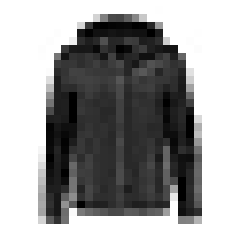

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

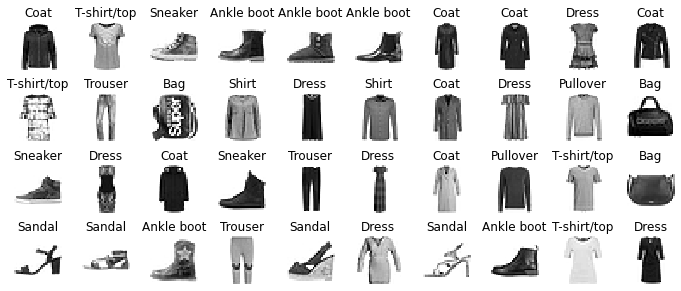

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [12]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [13]:
# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

In [16]:
hidden1 = model.layers[0]
hidden1.name

weights, biases = hidden1.get_weights()

In [17]:
weights

array([[[[ 0.06153144, -0.00142755, -0.03219079,  0.03286286,
           0.14723945, -0.14885725,  0.09077007,  0.03572313,
           0.1301294 ,  0.04631187, -0.02861321,  0.04415752,
          -0.04391993,  0.08272195,  0.012445  ,  0.00972699,
          -0.11038703,  0.00085555, -0.09696008, -0.03349965,
           0.08300112,  0.01262058, -0.01948719, -0.12804006,
          -0.09365067,  0.1103487 , -0.06890384,  0.06408925,
           0.12826028, -0.13353778,  0.14883003,  0.06759593,
           0.0968698 , -0.03095581, -0.05762222, -0.14460613,
           0.08469726,  0.06797078, -0.10368852,  0.02127279,
           0.0323001 , -0.04227797,  0.09151037, -0.13346662,
           0.08028869,  0.14561853, -0.08058517, -0.10983583,
          -0.13293768,  0.1102533 ,  0.01950136,  0.06524749,
          -0.04801424, -0.09307399,  0.07082084,  0.07480232,
          -0.02300809,  0.01427142,  0.13730627, -0.08296592,
          -0.01979077,  0.04459128, -0.04658531,  0.10305288]],

     

In [18]:
print(weights.shape)

(2, 2, 1, 64)


In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Mozna też uzyć w tej formie:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')
history = model.fit(X_train,
                    y_train,
                    batch_size=64,
                    epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
860/860 [==============================] - 22s 25ms/step - loss: 1.3770 - accuracy: 0.4817 - val_loss: 0.8257 - val_accuracy: 0.6920
Epoch 2/10
860/860 [==============================] - 22s 25ms/step - loss: 0.8971 - accuracy: 0.6493 - val_loss: 0.7243 - val_accuracy: 0.7202
Epoch 3/10
860/860 [==============================] - 22s 25ms/step - loss: 0.8123 - accuracy: 0.6863 - val_loss: 0.6726 - val_accuracy: 0.7388
Epoch 4/10
860/860 [==============================] - 21s 25ms/step - loss: 0.7554 - accuracy: 0.7090 - val_loss: 0.6280 - val_accuracy: 0.7730
Epoch 5/10
860/860 [==============================] - 21s 25ms/step - loss: 0.7087 - accuracy: 0.7262 - val_loss: 0.5852 - val_accuracy: 0.7876
Epoch 6/10
860/860 [==============================] - 21s 25ms/step - loss: 0.6754 - accuracy: 0.7418 - val_loss: 0.5557 - val_accuracy: 0.7934
Epoch 7/10
860/860 [==============================] - 21s 25ms/step - loss: 0.6432 - accuracy: 0.7546 - val_loss: 0.5295 - val_accuracy:

In [23]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 860}

In [24]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

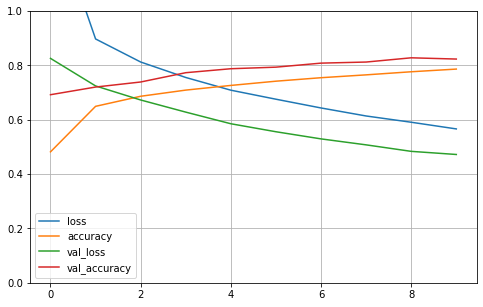

In [26]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5017 - accuracy: 0.8012


[0.5016864538192749, 0.8011999726295471]

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 103ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.13, 0.  , 0.85],
       [0.  , 0.  , 0.95, 0.  , 0.02, 0.  , 0.03, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 18ms/step


array([[4.2578406e-05, 7.2776338e-06, 5.5996738e-06, 8.9316109e-06,
        5.1740044e-06, 1.7818417e-02, 1.6201124e-05, 1.2679282e-01,
        1.1618080e-03, 8.5414124e-01],
       [4.4830848e-04, 6.0253362e-05, 9.4758952e-01, 3.5288820e-05,
        2.2849878e-02, 3.5135386e-07, 2.8971070e-02, 1.9976007e-08,
        4.5267985e-05, 3.3697379e-08],
       [5.4325569e-06, 9.9991667e-01, 3.6673502e-08, 6.9109250e-05,
        7.8588491e-06, 1.1019581e-07, 7.8655108e-07, 1.6713987e-08,
        2.3481963e-08, 6.5388024e-09]], dtype=float32)

In [38]:
# np.array(class_names)[y_pred]

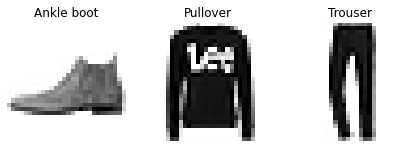

In [39]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()